In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm  # For color shading
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Conv1D, SimpleRNN, Dense, Dropout, InputLayer

In [13]:
# read emoticon dataset
train_emoticon_df = pd.read_csv("datasets/train/train_emoticon.csv")
train_emoticon_X = train_emoticon_df['input_emoticon'].tolist()
# train_emoticon_X = [list(datapoint) for datapoint in train_emoticon_X]
train_emoticon_Y = train_emoticon_df['label'].tolist()

# read emoticon validation-set
val_emoticon_df = pd.read_csv("datasets/valid/valid_emoticon.csv")
val_emoticon_X = val_emoticon_df['input_emoticon'].tolist()
# val_emoticon_X = [list(datapoint) for datapoint in val_emoticon_X]
val_emoticon_Y = val_emoticon_df['label'].tolist()

# read emoticon test-set
test_emoticon_df = pd.read_csv("datasets/test/test_emoticon.csv")
test_emoticon_X = test_emoticon_df['input_emoticon'].tolist()

# read text_seq dataset
train_text_seq_df = pd.read_csv("datasets/train/train_text_seq.csv")
train_text_seq_X = train_text_seq_df['input_str'].tolist()
train_text_seq_Y = train_text_seq_df['label'].tolist()

# read text_seq validation-set
val_text_seq_df = pd.read_csv("datasets/valid/valid_text_seq.csv")
val_text_seq_X = val_text_seq_df['input_str'].tolist()
val_text_seq_Y = val_text_seq_df['label'].tolist()

# read text_seq test-set
test_text_seq_df = pd.read_csv("datasets/test/test_text_seq.csv")
test_text_seq_X = test_text_seq_df['input_str'].tolist()

training_data_count = len(train_emoticon_X)
validation_data_count = len(val_emoticon_X)
test_data_count = len(test_emoticon_X)

In [15]:
train_y = np.array(train_text_seq_Y)
val_y = np.array(val_text_seq_Y)

In [17]:
feature_mapping = dict()
combined_emoticon_X = train_emoticon_X+test_emoticon_X
combined_text_seq_X = train_text_seq_X+test_text_seq_X

for i in range(training_data_count+test_data_count):
    feature_mapping[combined_emoticon_X[i]] = combined_text_seq_X[i]

In [19]:
emozi_set = set()
for datapoint in combined_emoticon_X:
    for emozi in datapoint:
        emozi_set.add(emozi)
emozi_list = sorted(list(emozi_set),key=lambda ele:
                        ele.encode('unicode-escape').decode('ASCII'))

In [21]:
print(emozi_list)
print(len(emozi_list))

['😀', '😁', '😂', '😃', '😄', '😅', '😆', '😇', '😈', '😉', '😊', '😋', '😌', '😍', '😎', '😏', '😐', '😑', '😒', '😓', '😔', '😕', '😖', '😗', '😘', '😙', '😚', '😛', '😜', '😝', '😞', '😟', '😠', '😡', '😢', '😣', '😤', '😥', '😦', '😧', '😨', '😩', '😪', '😫', '😬', '😭', '😮', '😯', '😰', '😱', '😲', '😳', '😴', '😵', '😶', '😷', '😸', '😹', '😺', '😻', '😼', '😽', '😾', '😿', '🙀', '🙁', '🙂', '🙃', '🙄', '🙅', '🙆', '🙇', '🙈', '🙉', '🙊', '🙋', '🙌', '🙍', '🙎', '🙏', '🙐', '🙑', '🙒', '🙓', '🙔', '🙕', '🙖', '🙗', '🙘', '🙙', '🙚', '🙛', '🙜', '🙝', '🙞', '🙟', '🙠', '🙡', '🙢', '🙣', '🙤', '🙥', '🙦', '🙧', '🙨', '🙩', '🙪', '🙫', '🙬', '🙭', '🙮', '🙯', '🙰', '🙱', '🙲', '🙳', '🙴', '🙵', '🙶', '🙷', '🙸', '🙹', '🙺', '🙻', '🙼', '🙽', '🙾', '🙿', '🚀', '🚁', '🚂', '🚃', '🚄', '🚅', '🚆', '🚇', '🚈', '🚉', '🚊', '🚋', '🚌', '🚍', '🚎', '🚏', '🚐', '🚑', '🚒', '🚓', '🚔', '🚕', '🚖', '🚗', '🚘', '🚙', '🚚', '🚛', '🚜', '🚝', '🚞', '🚟', '🚠', '🚡', '🚢', '🚣', '🚤', '🚥', '🚦', '🚧', '🚨', '🚩', '🚪', '🚫', '🚬', '🚭', '🚮', '🚯', '🚰', '🚱', '🚲', '🚳', '🚴', '🚵', '🚶', '🚷', '🚸', '🚹', '🚺', '🚻', '🚼', '🚽', '🚾', '🚿', '🛀', '🛁', '🛂', '🛃', '🛄', '🛅', '🛆', '🛇',

In [23]:
def get_common_substrings(str1, str2):
    substrings = []
    for start in range(len(str1)):
        for end in range(start+1, len(str1)+1):
            substr = str1[start:end]
            if str2.find(substr) != -1:
                substrings.append(substr)
    substrings = list(set(substrings))
    return substrings

In [25]:
toppers = ['😛', '🚼', '🙯', '🙼', '🛐', '😑', '😣']
toppers_enc = ['15436', '422', '262', '284', '464', '1596', '614']

In [27]:
symbol_label = dict()
for emozi in emozi_list:
    e_seq_list = []
    t_seq_list = []
    for seq in combined_emoticon_X:
        if emozi in seq:
            e_seq_list.append(seq)
            t_seq_list.append(feature_mapping[seq])

    common_emozi = get_common_substrings(e_seq_list[0], e_seq_list[1])
    common_text = get_common_substrings(t_seq_list[0], t_seq_list[1])

    for i in range(len(e_seq_list)):
        curr_emozi_seq = e_seq_list[i]
        curr_text_seq = t_seq_list[i]
        
        for emozi_str in common_emozi.copy():
            if curr_emozi_seq.find(emozi_str) == -1:
                common_emozi.remove(emozi_str)
        for text in common_text.copy():
            if curr_text_seq.find(text) == -1:
                common_text.remove(text)
    
    for emozi_ in common_emozi.copy():
        if emozi_ in toppers:
            common_emozi.remove(emozi_)

    
    for enc in common_text.copy():
        for enc_ in toppers_enc:
            if enc_.find(enc) != -1:
                common_text.remove(enc)
                break

    # print(emozi," : ",common_emozi," : ", max([int(string) for string in common_text]))
    symbol_label[emozi] = max([int(string) for string in common_text])

for i in range(len(toppers)):
    symbol_label[toppers[i]] = int(toppers_enc[i])

In [28]:
print(symbol_label)

{'😀': 2050, '😁': 6659, '😂': 10256, '😃': 7184, '😄': 11796, '😅': 1558, '😆': 2075, '😇': 2078, '😈': 2079, '😉': 3104, '😊': 2598, '😋': 1065, '😌': 3626, '😍': 2091, '😎': 23594, '😏': 5163, '😐': 10804, '😑': 1596, '😒': 3132, '😓': 3134, '😔': 2623, '😕': 2624, '😖': 2620, '😗': 3645, '😘': 12352, '😙': 2121, '😚': 5705, '😛': 15436, '😜': 6224, '😝': 27224, '😞': 28251, '😟': 1628, '😠': 24671, '😡': 1120, '😢': 3682, '😣': 614, '😤': 9831, '😥': 1129, '😦': 2154, '😧': 6761, '😨': 4205, '😩': 2670, '😪': 3695, '😫': 7794, '😬': 5237, '😭': 12921, '😮': 2682, '😯': 16510, '😰': 13956, '😱': 1157, '😲': 5254, '😳': 23684, '😴': 3720, '😵': 11918, '😶': 5774, '😷': 12438, '😸': 2713, '😹': 4761, '😺': 670, '😻': 2718, '😼': 9388, '😽': 5296, '😾': 19122, '😿': 4790, '🙀': 2231, '🙁': 18103, '🙂': 5824, '🙃': 1730, '🙄': 1731, '🙅': 3270, '🙆': 25800, '🙇': 46283, '🙈': 19661, '🙉': 39630, '🙊': 4304, '🙋': 20690, '🙌': 1235, '🙍': 5332, '🙎': 5333, '🙏': 4310, '🙐': 1238, '🙑': 2776, '🙒': 4309, '🙓': 8922, '🙔': 2775, '🙕': 2780, '🙖': 1245, '🙗': 12506, '🙘': 24288

In [29]:
train_text_X = []
val_text_X = []

for string in train_emoticon_X:
    features = []
    for emozi in string:
        features.append(symbol_label[emozi])
    features = np.array(features)
    train_text_X.append(features)
train_text_X = np.array(train_text_X)

for string in val_emoticon_X:
    features = []
    for emozi in string:
        features.append(symbol_label[emozi])
    features = np.array(features)
    val_text_X.append(features)
val_text_X = np.array(val_text_X)

In [33]:
s_scalar = StandardScaler()
s_scalar.fit(train_text_X)

scaled_train_X = s_scalar.transform(train_text_X)
scaled_val_X = s_scalar.transform(val_text_X)

<function matplotlib.pyplot.show(close=None, block=None)>

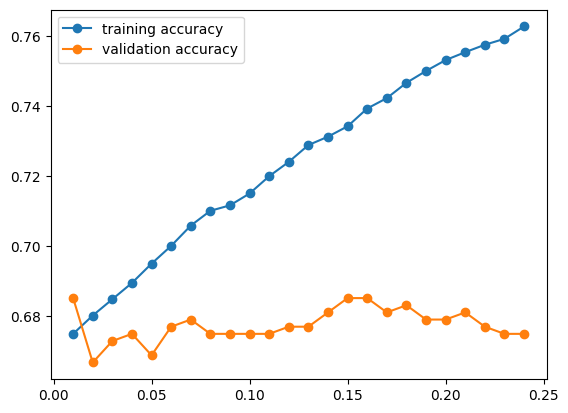

In [12]:
k = []
t_acc = []
v_acc = []
for gamma in np.arange(0.01,0.25,0.01):
    RBF_classifier = svm.SVC(kernel='rbf', gamma=gamma, C=1)
    RBF_classifier.fit(scaled_train_X,train_y)
    k.append(gamma)
    t_acc.append(RBF_classifier.score(scaled_train_X, train_y))
    v_acc.append(RBF_classifier.score(scaled_val_X, val_y))

plt.plot(k,t_acc, marker='o', label='training accuracy')
plt.plot(k, v_acc, marker='o', label='validation accuracy')
labels = plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

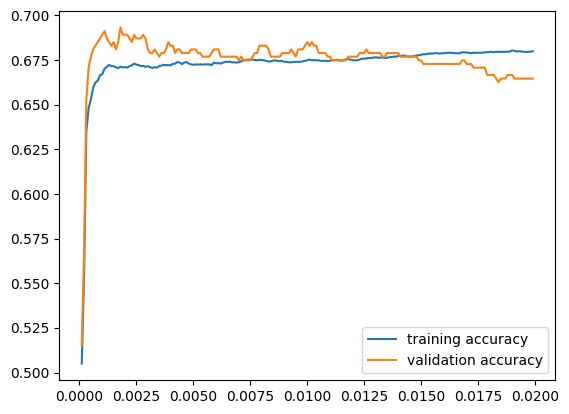

In [117]:
k = []
t_acc = []
v_acc = []
for gamma in np.arange(0.0001,0.02,0.0001):
    RBF_classifier = svm.SVC(kernel='rbf', gamma=gamma, C=1)
    RBF_classifier.fit(scaled_train_X,train_y)
    k.append(gamma)
    t_acc.append(RBF_classifier.score(scaled_train_X, train_y))
    v_acc.append(RBF_classifier.score(scaled_val_X, val_y))

plt.plot(k,t_acc, label='training accuracy')
plt.plot(k, v_acc, label='validation accuracy')
labels = plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

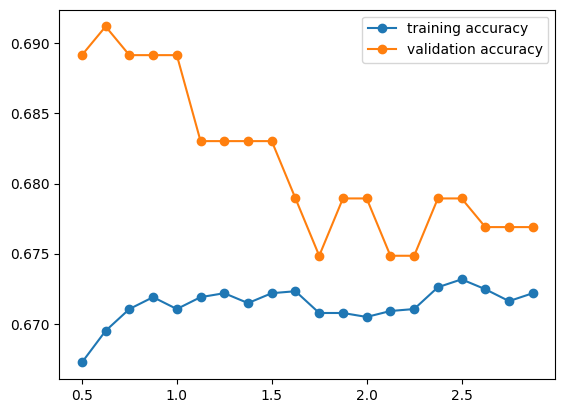

In [113]:
k = []
t_acc = []
v_acc = []
for c in np.arange(0.5,3,0.125):
    RBF_classifier = svm.SVC(kernel='rbf', gamma=0.002, C=c)
    RBF_classifier.fit(scaled_train_X,train_y)
    k.append(c)
    t_acc.append(RBF_classifier.score(scaled_train_X, train_y))
    v_acc.append(RBF_classifier.score(scaled_val_X, val_y))

plt.plot(k,t_acc, marker='o', label='training accuracy')
plt.plot(k, v_acc, marker='o', label='validation accuracy')
labels = plt.legend()
plt.show

In [12]:
RBF_classifier = svm.SVC(kernel='rbf', gamma=0.002, C=0.625)
RBF_classifier.fit(scaled_train_X,train_y)
print('training-accuracy: ', RBF_classifier.score(scaled_train_X, train_y))
print('validation-accuracy: ', RBF_classifier.score(scaled_val_X, val_y))

training-accuracy:  0.6694915254237288
validation-accuracy:  0.6912065439672802


In [35]:
train_text_X2 = []
val_text_X2 = []
test_text_X2 = []

for string in train_emoticon_X:
    features = []
    for emozi in string:
        if emozi in toppers:
            # features.append(0)
            continue
        else:
            features.append(symbol_label[emozi])
    features = np.array(features)
    train_text_X2.append(features)
train_text_X2 = np.array(train_text_X2)

for string in val_emoticon_X:
    features = []
    for emozi in string:
        if emozi in toppers:
            # features.append(0)
            continue
        else:
            features.append(symbol_label[emozi])
    features = np.array(features)
    val_text_X2.append(features)
val_text_X2 = np.array(val_text_X2)

for string in test_emoticon_X:
    features = []
    for emozi in string:
        if emozi in toppers:
            # features.append(0)
            continue
        else:
            features.append(symbol_label[emozi])
    features = np.array(features)
    test_text_X2.append(features)
test_text_X2 = np.array(test_text_X2)

In [37]:
s_scalar = StandardScaler()
s_scalar.fit(train_text_X2)

scaled_train_X2 = s_scalar.transform(train_text_X2)
scaled_val_X2 = s_scalar.transform(val_text_X2)

<function matplotlib.pyplot.show(close=None, block=None)>

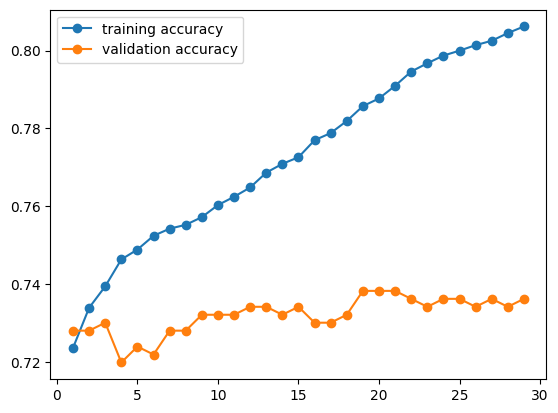

In [15]:
k = []
t_acc = []
v_acc = []
for gamma in np.arange(1,30):
    RBF_classifier = svm.SVC(kernel='rbf', gamma=gamma, C=1)
    RBF_classifier.fit(scaled_train_X2,train_y)
    k.append(gamma)
    t_acc.append(RBF_classifier.score(scaled_train_X2, train_y))
    v_acc.append(RBF_classifier.score(scaled_val_X2, val_y))

plt.plot(k,t_acc, marker='o', label='training accuracy')
plt.plot(k, v_acc, marker='o', label='validation accuracy')
labels = plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

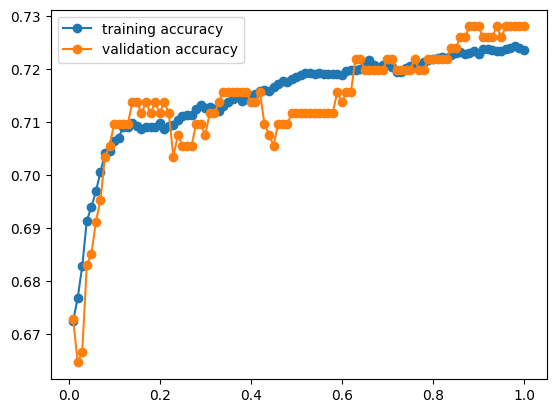

In [41]:
k = []
t_acc = []
v_acc = []
for gamma in np.arange(0.01,1.01,0.01):
    RBF_classifier = svm.SVC(kernel='rbf', gamma=gamma, C=1)
    RBF_classifier.fit(scaled_train_X2,train_y)
    k.append(gamma)
    t_acc.append(RBF_classifier.score(scaled_train_X2, train_y))
    v_acc.append(RBF_classifier.score(scaled_val_X2, val_y))

plt.plot(k,t_acc, marker='o', label='training accuracy')
plt.plot(k, v_acc, marker='o', label='validation accuracy')
labels = plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

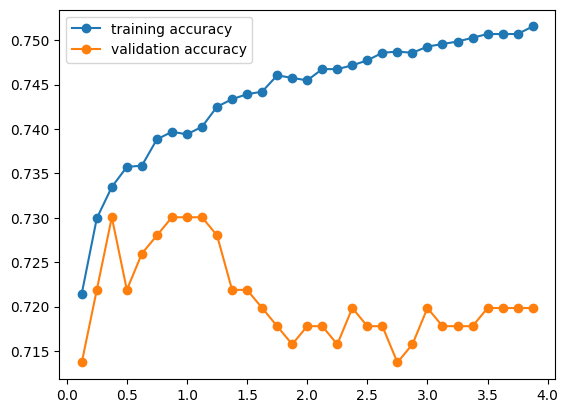

In [67]:
k = []
t_acc = []
v_acc = []
for c in np.arange(0.125,4,0.125):
    RBF_classifier = svm.SVC(kernel='rbf', gamma=3, C=c)
    RBF_classifier.fit(scaled_train_X2,train_y)
    k.append(c)
    t_acc.append(RBF_classifier.score(scaled_train_X2, train_y))
    v_acc.append(RBF_classifier.score(scaled_val_X2, val_y))

plt.plot(k,t_acc, marker='o', label='training accuracy')
plt.plot(k, v_acc, marker='o', label='validation accuracy')
labels = plt.legend()
plt.show

In [41]:
i=0.2
while i<=1:
    dtst=int(i*7080)
    RBF_classifier2 = svm.SVC(kernel='rbf', gamma=21.2, C=0.75)
    RBF_classifier2.fit(scaled_train_X2[:dtst],train_y[:dtst])
    print("dataset =",i)
    print('training-accuracy: ', RBF_classifier2.score(scaled_train_X2[:dtst],train_y[:dtst]))
    print('validation-accuracy: ', RBF_classifier2.score(scaled_val_X2, val_y))
    i=i+0.2

dataset = 0.2
training-accuracy:  0.8608757062146892
validation-accuracy:  0.7014314928425358
dataset = 0.4
training-accuracy:  0.8125
validation-accuracy:  0.7157464212678937
dataset = 0.6000000000000001
training-accuracy:  0.8024952919020716
validation-accuracy:  0.7157464212678937
dataset = 0.8
training-accuracy:  0.7930790960451978
validation-accuracy:  0.7300613496932515
dataset = 1.0
training-accuracy:  0.7847457627118644
validation-accuracy:  0.7443762781186094


In [17]:
print(train_text_X2[:20])
print(test_text_X2[:20])

[[ 2718  2800  3132]
 [ 3695 11047  4761]
 [ 5999 13580  4051]
 [ 1238  8956  3510]
 [ 1899 20690  4761]
 [33658  2919  2780]
 [ 8055  5237  3365]
 [ 5999  8526  1495]
 [30699  5705  2414]
 [26390  2091  4790]
 [36068  2091  2713]
 [16510  2718  4761]
 [ 4309  7002  5237]
 [ 4790 20371  3720]
 [18721  2154  3324]
 [ 5103  3104  4309]
 [11918  1828  2919]
 [ 3510 12352  2598]
 [ 1899  3626  4790]
 [15611  3104  3901]]
[[33763  5607  5332]
 [ 6420 28251  3324]
 [30699  6420  5892]
 [ 3695  8526  4089]
 [14738  4846  5332]
 [ 3896  1954  6052]
 [25800   486  5607]
 [ 4846 15611  1954]
 [ 2776  5999  3459]
 [  670  5607  1954]
 [ 4846  1332  3829]
 [11918  3695  4846]
 [ 8526  2919  3829]
 [ 2079  1628  2414]
 [ 3023  9025  5892]
 [ 2079  1245  4846]
 [ 4349  2800  3865]
 [ 1339  6469  5824]
 [ 4531 39630  5774]
 [36068  2548  2079]]


In [16]:
param_grid = {
    'C': np.arange(0.125,4,0.125).tolist(),
    'gamma': np.arange(1,30).tolist()
}

In [70]:
svm_clf = svm.SVC(kernel='rbf')
grid_search = GridSearchCV(svm_clf, param_grid, scoring='accuracy', cv=5, return_train_score=True, n_jobs=-1)
grid_search.fit(scaled_train_X2,train_y)
results = grid_search.cv_results_
train_scores = results['mean_train_score']
val_scores = results['mean_test_score']

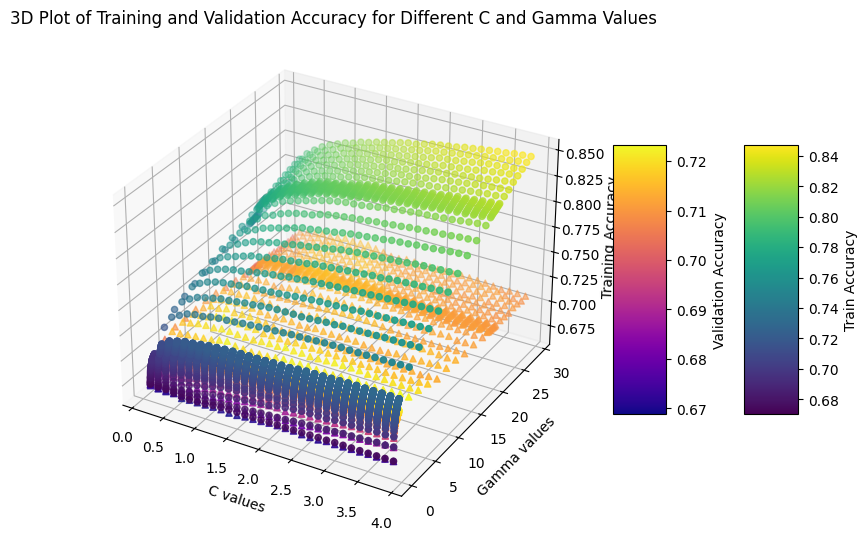

In [63]:
C_vals = np.array(results['param_C'].data, dtype=float)
gamma_vals = np.array(results['param_gamma'].data, dtype=float)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

train_plot = ax.scatter(C_vals, gamma_vals, train_scores, c=train_scores, cmap=cm.viridis, label='Train Accuracy')
ax.set_xlabel('C values')
ax.set_ylabel('Gamma values')
ax.set_zlabel('Training Accuracy')

val_plot = ax.scatter(C_vals, gamma_vals, val_scores, c=val_scores, cmap=cm.plasma, label='Validation Accuracy', marker='^')

cbar_train = plt.colorbar(train_plot, ax=ax, shrink=0.5, aspect=5)
cbar_train.set_label('Train Accuracy')
cbar_val = plt.colorbar(val_plot, ax=ax, shrink=0.5, aspect=5)
cbar_val.set_label('Validation Accuracy')

plt.title("3D Plot of Training and Validation Accuracy for Different C and Gamma Values")
plt.show()

In [43]:
print(np.concatenate([train_text_X2, test_text_X2], axis=0).shape)

(9312, 3)


In [45]:
code_set = set()
for symbol in symbol_label:
    code_set.add(symbol_label[symbol])
code_set = list(code_set)

In [20]:
print(code_set)
print(symbol_label)
print(emozi_list)

[2050, 6659, 10256, 7184, 11796, 1558, 2075, 2078, 2079, 3104, 2598, 1065, 3626, 2091, 23594, 5163, 10804, 3132, 1596, 3134, 2623, 2624, 2620, 3645, 12352, 2121, 5705, 15436, 6224, 27224, 28251, 1628, 24671, 1120, 3682, 614, 9831, 1129, 2154, 6761, 4205, 2670, 3695, 7794, 5237, 12921, 2682, 16510, 13956, 1157, 5254, 23684, 3720, 11918, 5774, 12438, 2713, 4761, 670, 2718, 9388, 5296, 19122, 4790, 2231, 18103, 5824, 1730, 1731, 3270, 25800, 46283, 19661, 39630, 4304, 20690, 1235, 5332, 5333, 4310, 1238, 2776, 4309, 8922, 2775, 2780, 1245, 12506, 24288, 6370, 36068, 2791, 17645, 4846, 4845, 3312, 2800, 3829, 1270, 16117, 4856, 49400, 30968, 15611, 3324, 4349, 8956, 2816, 1795, 5892, 4869, 262, 8967, 19207, 13580, 31505, 18195, 6420, 18708, 26390, 2327, 3349, 3865, 4371, 284, 1821, 3357, 4381, 22817, 1314, 18721, 1828, 3365, 11047, 4905, 2857, 35121, 1332, 3896, 1339, 3388, 3901, 9025, 6469, 21832, 5449, 4427, 14669, 8526, 6482, 10070, 32600, 1368, 7002, 34141, 10086, 2919, 2920, 11113, 18

In [47]:
code_to_label = {code:label for label,code in enumerate(code_set)}

In [22]:
print(code_to_label)

{2050: 0, 6659: 1, 10256: 2, 7184: 3, 11796: 4, 1558: 5, 2075: 6, 2078: 7, 2079: 8, 3104: 9, 2598: 10, 1065: 11, 3626: 12, 2091: 13, 23594: 14, 5163: 15, 10804: 16, 3132: 17, 1596: 18, 3134: 19, 2623: 20, 2624: 21, 2620: 22, 3645: 23, 12352: 24, 2121: 25, 5705: 26, 15436: 27, 6224: 28, 27224: 29, 28251: 30, 1628: 31, 24671: 32, 1120: 33, 3682: 34, 614: 35, 9831: 36, 1129: 37, 2154: 38, 6761: 39, 4205: 40, 2670: 41, 3695: 42, 7794: 43, 5237: 44, 12921: 45, 2682: 46, 16510: 47, 13956: 48, 1157: 49, 5254: 50, 23684: 51, 3720: 52, 11918: 53, 5774: 54, 12438: 55, 2713: 56, 4761: 57, 670: 58, 2718: 59, 9388: 60, 5296: 61, 19122: 62, 4790: 63, 2231: 64, 18103: 65, 5824: 66, 1730: 67, 1731: 68, 3270: 69, 25800: 70, 46283: 71, 19661: 72, 39630: 73, 4304: 74, 20690: 75, 1235: 76, 5332: 77, 5333: 78, 4310: 79, 1238: 80, 2776: 81, 4309: 82, 8922: 83, 2775: 84, 2780: 85, 1245: 86, 12506: 87, 24288: 88, 6370: 89, 36068: 90, 2791: 91, 17645: 92, 4846: 93, 4845: 94, 3312: 95, 2800: 96, 3829: 97, 1270:

In [49]:
train_X2_transformed = []
val_X2_transformed =[]
test_X2_transformed = []
for datapoint in train_text_X2:
    train_X2_transformed.append([code_to_label[code] for code in datapoint])
for datapoint in val_text_X2:
    val_X2_transformed.append([code_to_label[code] for code in datapoint])
for datapoint in test_text_X2:
    test_X2_transformed.append([code_to_label[code] for code in datapoint])
train_X2_transformed = np.array(train_X2_transformed)
val_X2_transformed = np.array(val_X2_transformed)
test_X2_transformed = np.array(test_X2_transformed)

In [24]:
print(val_X2_transformed[:5])

[[ 20 154 141]
 [ 87 120   9]
 [169 132  56]
 [ 33 123  17]
 [104  51  26]]


In [67]:
model3 = Sequential()
model3.add(Embedding(input_dim=len(code_set), output_dim=16)) # input_dim=207 unique symbols, output_dim=16-dim embeddings
model3.add(GRU(32)) # gru 32
model3.add(Dropout(0.3))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [69]:
model3.fit(train_X2_transformed, train_y,
           epochs = 50,
           verbose = 1,
           validation_data = (val_X2_transformed, val_y),
           shuffle = True,
           validation_freq = 1
        )

Epoch 1/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5439 - loss: 0.6760 - val_accuracy: 0.9325 - val_loss: 0.1779
Epoch 2/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9402 - loss: 0.1475 - val_accuracy: 0.9673 - val_loss: 0.0776
Epoch 3/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9621 - loss: 0.0880 - val_accuracy: 0.9714 - val_loss: 0.0769
Epoch 4/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9745 - loss: 0.0649 - val_accuracy: 0.9755 - val_loss: 0.0601
Epoch 5/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9743 - loss: 0.0587 - val_accuracy: 0.9714 - val_loss: 0.0552
Epoch 6/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9790 - loss: 0.0512 - val_accuracy: 0.9796 - val_loss: 0.0533
Epoch 7/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9840 - loss: 0.0403 - val_accuracy: 0.9755 - val_loss: 0.0652
Epoch 8/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9844 - loss: 0.0384 - val_accuracy: 0

In [70]:
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 3, 16)               │           3,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 32)                  │           4,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,069 (101.84 KB)

 Trainable params: 8,689 (33.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,380 (67.89 KB)

In [77]:
# using cnn
model_cnn = Sequential()
model_cnn.add(Embedding(input_dim=len(code_set), output_dim=16)) # input_dim=207 unique symbols, output_dim=16-dim embeddings
model_cnn.add(Conv1D(filters=8, kernel_size=2, activation='relu'))
model_cnn.add(SimpleRNN(16))
model_cnn.add(Dropout(0.3))
model_cnn.add(Dense(8, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_cnn.fit(train_X2_transformed, train_y,
           epochs = 50,
           verbose = 1,
           validation_data = (val_X2_transformed, val_y),
           shuffle = True,
           validation_freq = 1
        )

Epoch 1/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.6065 - loss: 0.6437 - val_accuracy: 0.9530 - val_loss: 0.1563
Epoch 2/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9474 - loss: 0.1459 - val_accuracy: 0.9652 - val_loss: 0.0865
Epoch 3/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9650 - loss: 0.0846 - val_accuracy: 0.9734 - val_loss: 0.0727
Epoch 4/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9813 - loss: 0.0558 - val_accuracy: 0.9611 - val_loss: 0.0791
Epoch 5/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9798 - loss: 0.0520 - val_accuracy: 0.9734 - val_loss: 0.0686
Epoch 6/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9818 - loss: 0.0468 - val_accuracy: 0.9796 - val_loss: 0.0480
Epoch 7/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9845 - loss: 0.0395 - val_accuracy: 0.9652 - val_loss: 0.0836
Epoch 8/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9891 - loss: 0.0306 - val_accuracy: 0.

In [78]:
model_cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 3, 16)               │           3,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 2, 8)                │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 16)                  │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,277 (51.87 KB)

 Trainable params: 4,425 (17.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,852 (34.58 KB)

0.2 	 0.96523517370224
0.4 	 0.9570552110671997
0.6000000000000001 	 0.9570552110671997
0.8 	 0.9672801494598389
1.0 	 0.9672801494598389


<function matplotlib.pyplot.show(close=None, block=None)>

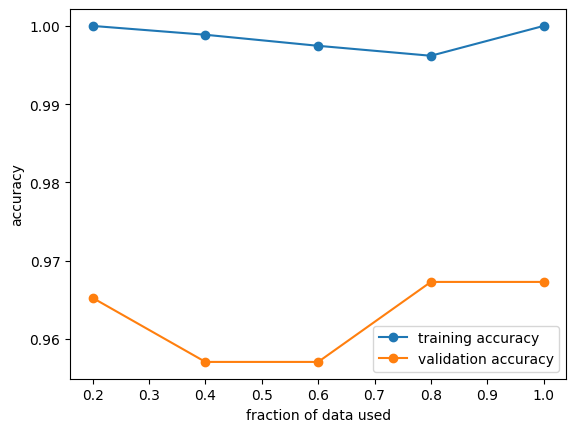

In [83]:
frac = []
t_acc = []
v_acc = []

for i in np.arange(0.2,1.1,0.2):
    model_cnn.fit(train_X2_transformed[:int(i*training_data_count)], train_y[:int(i*training_data_count)], 
          epochs = 50, 
          verbose = 0, 
        #   validation_data = (val_X2_transformed, val_y), 
          shuffle = True, 
          validation_freq = 1
    )
    frac.append(i)
    # predictions = model3.predict(X_val_red)
    # predicted_labels = (predictions > 0.5).astype("int32")
    t_loss, t_accuracy = model_cnn.evaluate(train_X2_transformed, train_y, verbose=0)
    v_loss, v_accuracy = model_cnn.evaluate(val_X2_transformed, val_y, verbose=0)
    t_acc.append(t_accuracy)
    v_acc.append(v_accuracy)
    print(i,'\t',v_accuracy)
plt.plot(frac,t_acc, marker='o', label='training accuracy')
plt.plot(frac, v_acc, marker='o', label='validation accuracy')
plt.legend()
plt.xlabel("fraction of data used")
plt.ylabel("accuracy")
plt.show


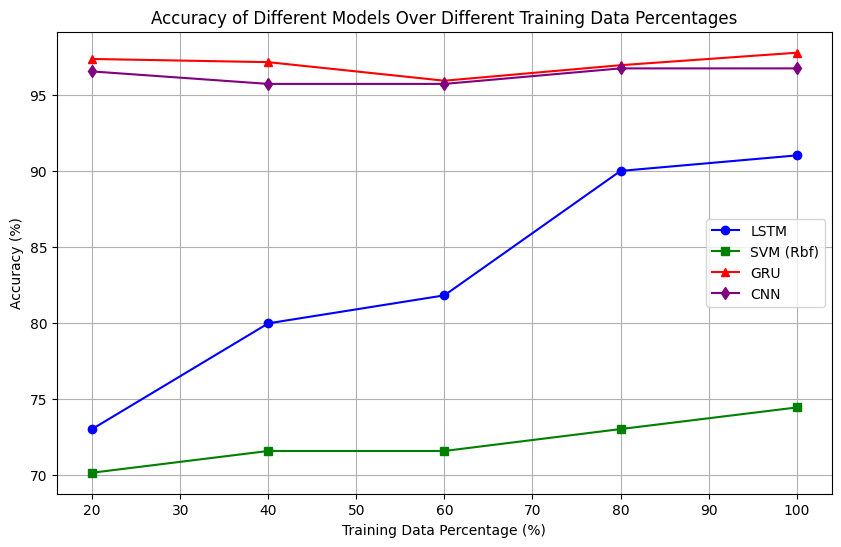

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
training_data_percentages = [20, 40, 60, 80, 100]
lstm_accuracy = [73.01, 79.96, 81.80, 89.98, 91.00]
svm_accuracy = [70.14, 71.57, 71.57, 73.01, 74.43]
gru_accuracy = [97.34, 97.13, 95.91, 96.93, 97.75]
cnn_accuracy = [96.52, 95.70, 95.70, 96.72, 96.72]

# Plotting the data
plt.figure(figsize=(10, 6))

# Plot each model's accuracy
plt.plot(training_data_percentages, lstm_accuracy, marker='o', label='LSTM', color='b')
plt.plot(training_data_percentages, svm_accuracy, marker='s', label='SVM (Rbf)', color='g')
plt.plot(training_data_percentages, gru_accuracy, marker='^', label='GRU', color='r')
plt.plot(training_data_percentages, cnn_accuracy, marker='d', label='CNN', color='purple')

# Adding titles and labels
plt.title('Accuracy of Different Models Over Different Training Data Percentages')
plt.xlabel('Training Data Percentage (%)')
plt.ylabel('Accuracy (%)')

# Adding grid, legend, and showing the plot
plt.grid(True)
plt.legend()

plt.show()
